In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract

In [7]:
fulfillment=pd.read_csv('/content/fulfillment.csv')
fulfillment.shape

(118, 2)

In [8]:
inventory=pd.read_csv('/content/inventory.csv')
inventory.shape

(4200, 4)

In [9]:
order=pd.read_csv('/content/orders_and_shipments.csv')
order.shape

(30871, 24)

# Transform

In [10]:
fulfillment.head()

,Product Name,Warehouse Order Fulfillment (days)
0,Perfect Fitness Perfect Rip Deck,8.3
1,Nike Men's Dri-FIT Victory Golf Polo,6.6
2,O'Brien Men's Neoprene Life Vest,5.5
3,Nike Men's Free 5.0+ Running Shoe,9.4
4,Under Armour Girls' Toddler Spine Surge Runni,6.3


In [11]:
fulfillment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Product Name                          118 non-null    object 
 1    Warehouse Order Fulfillment (days)   118 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


In [12]:
# Remove whitespace on column name
fulfillment.columns = fulfillment.columns.str.strip()

In [13]:
#checking for missing value
fulfillment.isna().sum()

Product Name                          0
Warehouse Order Fulfillment (days)    0
dtype: int64

In [14]:
inventory.head()

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit
0,Perfect Fitness Perfect Rip Deck,201712,0,0.69517
1,Nike Men's Dri-FIT Victory Golf Polo,201712,2,1.29291
2,O'Brien Men's Neoprene Life Vest,201712,0,0.56531
3,Nike Men's Free 5.0+ Running Shoe,201712,1,1.26321
4,Under Armour Girls' Toddler Spine Surge Runni,201712,0,1.47648


In [15]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product Name             4200 non-null   object 
 1    Year Month              4200 non-null   int64  
 2    Warehouse Inventory     4200 non-null   int64  
 3   Inventory Cost Per Unit  4200 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 131.4+ KB


In [16]:
# Removeb whitespace on column name
inventory.columns = inventory.columns.str.strip()

In [17]:
#checking for missing value
inventory.isna().sum()

Product Name               0
Year Month                 0
Warehouse Inventory        0
Inventory Cost Per Unit    0
dtype: int64

In [18]:
order.head()

,Order ID,Order Item ID,Order YearMonth,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,...,Customer Country,Warehouse Country,Shipment Year,Shipment Month,Shipment Day,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit
0,3535,8793,201502,2015,2,21,14:07,1,Fan Shop,Fishing,...,Mexico,Puerto Rico,2015,2,27,Standard Class,4,400,0.25,200
1,4133,10320,201503,2015,3,2,07:37,1,Fan Shop,Fishing,...,Brazil,Puerto Rico,2015,3,6,Standard Class,4,400,0.09,200
2,7396,18517,201504,2015,4,18,22:47,1,Fan Shop,Fishing,...,Mexico,Puerto Rico,2015,4,20,Standard Class,4,400,0.06,200
3,11026,27608,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,Denmark,Puerto Rico,2015,6,12,Standard Class,4,400,0.15,200
4,11026,27609,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,Denmark,Puerto Rico,2015,6,12,Standard Class,4,400,0.13,200


In [19]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30871 entries, 0 to 30870
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Order ID                     30871 non-null  int64 
 1    Order Item ID               30871 non-null  int64 
 2    Order YearMonth             30871 non-null  int64 
 3    Order Year                  30871 non-null  int64 
 4    Order Month                 30871 non-null  int64 
 5    Order Day                   30871 non-null  int64 
 6   Order Time                   30871 non-null  object
 7   Order Quantity               30871 non-null  int64 
 8   Product Department           30871 non-null  object
 9   Product Category             30871 non-null  object
 10  Product Name                 30871 non-null  object
 11   Customer ID                 30871 non-null  int64 
 12  Customer Market              30871 non-null  object
 13  Customer Region              30

In [20]:
# Remove whitespace on column name
order.columns = order.columns.str.strip()

In [21]:
# Drop unused columns
order = order.drop(['Order Item ID','Order Time'], axis=1)
order.columns

Index(['Order ID', 'Order YearMonth', 'Order Year', 'Order Month', 'Order Day',
       'Order Quantity', 'Product Department', 'Product Category',
       'Product Name', 'Customer ID', 'Customer Market', 'Customer Region',
       'Customer Country', 'Warehouse Country', 'Shipment Year',
       'Shipment Month', 'Shipment Day', 'Shipment Mode',
       'Shipment Days - Scheduled', 'Gross Sales', 'Discount %', 'Profit'],
      dtype='object')

In [22]:
# Change the datatype columns to string
order[['Order Year','Order Month','Order Day','Shipment Year','Shipment Month','Shipment Day']] = order[['Order Year','Order Month','Order Day','Shipment Year','Shipment Month','Shipment Day']].astype(str)

In [23]:
# Change Gross Sales and Profit columns to float
order[['Gross Sales','Profit']] = order[['Gross Sales','Profit']].astype(float)

In [24]:
# Remove trailing spaces from the 'Discount %' column
order['Discount %'] = order['Discount %'].str.strip()

# Replace '-' with 0 in the 'Discount %' column
order['Discount %'] = order['Discount %'].replace('-', float('0'))

# Change the datatype of 'Discount %' column to float
order['Discount %'] = order['Discount %'].astype(float)

order['Discount %']

0        0.25
1        0.09
2        0.06
3        0.15
4        0.13
         ... 
30866    0.06
30867    0.12
30868    0.09
30869    0.02
30870    0.00
Name: Discount %, Length: 30871, dtype: float64

In [25]:
order['Customer Country'].unique()

array(['Mexico', 'Brazil', 'Denmark', 'Netherlands', 'Germany', 'China',
       'Indonesia', 'Pakistan', 'India', 'USA', 'Hungary', 'Sudan',
       'Democratic Republic of Congo', 'Poland', 'Togo', 'Guatemala',
       'Panama', 'Chile', 'France', 'Sweden', 'Dominican�Republic',
       'Venezuela', 'South Korea', 'Madagascar', 'Iran', 'Cuba',
       'Nicaragua', 'United Kingdom', 'Afghanistan', 'Singapore',
       'Morocco', 'Spain', 'Niger', 'Turkey', 'South Africa', 'Iraq',
       'Honduras', 'Italy', 'Australia', 'Cote d�Ivoire', 'Croatia',
       'Ecuador', 'Syria', 'Haiti', 'Bangladesh', 'Argentina', 'Romania',
       'El Salvador', 'Vietnam', 'Japan', 'Nigeria', 'Belarus',
       'Uzbekistan', 'Egypt', 'Albania', 'Georgia', 'Cameroon',
       'Colombia', 'New zealand', 'Canada', 'Thailand', 'Senegal',
       'Russia', 'Per�', 'Algeria�', 'Ukraine', 'Belgium', 'Philippines',
       'Austria', 'Uruguay', 'Malaysia', 'Hong Kong', 'Saudi Arabia',
       'Switzerland', 'Ireland', 'Bulg

In [27]:
# Replace the special characters
order['Customer Country'] = order['Customer Country'].replace({
    'Dominican�Republic': 'Dominican Republic',
    'Cote d�Ivoire': 'Cote d Ivoire',
    'Per�': 'Peru',
    'Algeria�': 'Algeria',
    'Israel�':'Israel',
    'Ben�n': 'Benin'
})
order['Customer Country'].unique()

array(['Mexico', 'Brazil', 'Denmark', 'Netherlands', 'Germany', 'China',
       'Indonesia', 'Pakistan', 'India', 'USA', 'Hungary', 'Sudan',
       'Democratic Republic of Congo', 'Poland', 'Togo', 'Guatemala',
       'Panama', 'Chile', 'France', 'Sweden', 'Dominican Republic',
       'Venezuela', 'South Korea', 'Madagascar', 'Iran', 'Cuba',
       'Nicaragua', 'United Kingdom', 'Afghanistan', 'Singapore',
       'Morocco', 'Spain', 'Niger', 'Turkey', 'South Africa', 'Iraq',
       'Honduras', 'Italy', 'Australia', 'Cote d Ivoire', 'Croatia',
       'Ecuador', 'Syria', 'Haiti', 'Bangladesh', 'Argentina', 'Romania',
       'El Salvador', 'Vietnam', 'Japan', 'Nigeria', 'Belarus',
       'Uzbekistan', 'Egypt', 'Albania', 'Georgia', 'Cameroon',
       'Colombia', 'New zealand', 'Canada', 'Thailand', 'Senegal',
       'Russia', 'Peru', 'Algeria', 'Ukraine', 'Belgium', 'Philippines',
       'Austria', 'Uruguay', 'Malaysia', 'Hong Kong', 'Saudi Arabia',
       'Switzerland', 'Ireland', 'Bulga

In [31]:
# Function to remove decimal points from date strings
def remove_decimal_points(value):
    if isinstance(value, float):
        value = str(value)
    return value.replace('.0', '')

# Apply the function
order['Shipment Year'] = order['Shipment Year'].apply(remove_decimal_points)
order['Shipment Month'] = order['Shipment Month'].apply(remove_decimal_points)
order['Shipment Day'] = order['Shipment Day'].apply(remove_decimal_points)
order['Order Year'] = order['Order Year'].apply(remove_decimal_points)
order['Order Month'] = order['Order Month'].apply(remove_decimal_points)
order['Order Day'] = order['Order Day'].apply(remove_decimal_points)


In [32]:
order.isna().sum()

Order ID                     0
Order YearMonth              0
Order Year                   0
Order Month                  0
Order Day                    0
Order Quantity               0
Product Department           0
Product Category             0
Product Name                 0
Customer ID                  0
Customer Market              0
Customer Region              0
Customer Country             0
Warehouse Country            0
Shipment Year                0
Shipment Month               0
Shipment Day                 0
Shipment Mode                0
Shipment Days - Scheduled    0
Gross Sales                  0
Discount %                   0
Profit                       0
dtype: int64

In [33]:
# Looking for duplicates
order[order.duplicated()]

,Order ID,Order YearMonth,Order Year,Order Month,Order Day,Order Quantity,Product Department,Product Category,Product Name,Customer ID,...,Customer Country,Warehouse Country,Shipment Year,Shipment Month,Shipment Day,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit


In [34]:
# Looking for duplicates
inventory[inventory.duplicated()]

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit


In [35]:
# Looking for duplicates
fulfillment[fulfillment.duplicated()]

,Product Name,Warehouse Order Fulfillment (days)


In [56]:
# Create a new DataFrame Product Dataframe
product_info = order[['Product Name', 'Product Category', 'Product Department']]

# Drop the duplicates
product = product_info.drop_duplicates()
product

# Create a new csv file, this will be helpfull to create PowerBi dashboards later
product.to_csv('product.csv', index=False)

In [40]:
# Merge the product table and the inventory table with the key, to know the average storage cost
inventory_merge = pd.merge(inventory, product, on='Product Name', how='left')
inventory_merge

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit,Product Category,Product Department
0,Perfect Fitness Perfect Rip Deck,201712,0,0.69517,Cleats,Apparel
1,Nike Men's Dri-FIT Victory Golf Polo,201712,2,1.29291,Women's Apparel,Golf
2,O'Brien Men's Neoprene Life Vest,201712,0,0.56531,Indoor/Outdoor Games,Fan Shop
3,Nike Men's Free 5.0+ Running Shoe,201712,1,1.26321,Cardio Equipment,Footwear
4,Under Armour Girls' Toddler Spine Surge Runni,201712,0,1.47648,Shop By Sport,Golf
...,...,...,...,...,...,...
4195,TaylorMade 2017 Purelite Stand Bag,201501,0,1.44662,Golf Gloves,Outdoors
4196,Ogio Race Golf Shoes,201501,0,0.10310,Golf Bags & Carts,Outdoors
4197,GolfBuddy VT3 GPS Watch,201501,0,1.77747,Kids' Golf Clubs,Outdoors
4198,Titleist Small Wheeled Travel Cover,201501,0,0.15244,Golf Gloves,Outdoors


In [41]:
# Checking the missing value
inventory_merge.isna().sum()

Product Name                 0
Year Month                   0
Warehouse Inventory          0
Inventory Cost Per Unit      0
Product Category           175
Product Department         175
dtype: int64

In [42]:
inventory_merge[(inventory_merge['Product Category'].isna()) | (inventory_merge['Product Department'].isna())]

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit,Product Category,Product Department
56,Dell Laptop,201712,14,1.56369,NaN,NaN
114,SOLE E35 Elliptical,201712,1,0.36106,NaN,NaN
115,Bushnell Pro X7 Jolt Slope Rangefinder,201712,9,2.22684,NaN,NaN
116,SOLE E25 Elliptical,201712,23,1.84297,NaN,NaN
117,Bowflex SelectTech 1090 Dumbbells,201712,36,1.49431,NaN,NaN
...,...,...,...,...,...,...
4068,Dell Laptop,201502,37,2.16324,NaN,NaN
4126,SOLE E35 Elliptical,201502,3,1.85317,NaN,NaN
4127,Bushnell Pro X7 Jolt Slope Rangefinder,201502,35,1.22691,NaN,NaN
4128,SOLE E25 Elliptical,201502,18,1.07032,NaN,NaN


In [43]:
# There are 5 product that appear in the inventory table but not in the order table.
# This means that these are items that are in the company's inventory but have not been ordered by the customer.
# I decided to keep these product names as they account for a considerable amount of storage cost
inventory_merge['Product Category'].fillna('None', inplace=True)
inventory_merge['Product Department'].fillna('None', inplace=True)

# Looking for duplicates
inventory_merge[inventory_merge['Product Department'].isna()]

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit,Product Category,Product Department


In [44]:
from datetime import datetime

# Concatenate year, month, day column to create Order Date and Shipment Date columns
order['Order Date'] = order['Order Year'].astype(str) + '/' + order['Order Month'].astype(str) + '/' + order['Order Day'].astype(str)
order['Order Date'] = pd.to_datetime(order['Order Date'])
order['Order Date'] = order['Order Date'].dt.strftime('%Y/%m/%d')
order['Order YearMonth'] = order['Order YearMonth'].astype(str)

order['Shipment Date'] = pd.to_datetime(
    order['Shipment Year'] + '/' + order['Shipment Month'] + '/' + order['Shipment Day'],
    format='%Y/%m/%d',
    errors='coerce'
)
order['Shipment Date'] = order['Shipment Date'].dt.strftime('%Y-%m-%d')
order['Shipment YearMonth'] = order['Shipment Year'].astype(str) + '-' + order['Shipment Month'].astype(str)

In [46]:
inventory_merge['Year Month']=pd.to_datetime(inventory_merge['Year Month'], format='%Y%m').dt.strftime('%Y/%m')
inventory_merge

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit,Product Category,Product Department
0,Perfect Fitness Perfect Rip Deck,2017/12,0,0.69517,Cleats,Apparel
1,Nike Men's Dri-FIT Victory Golf Polo,2017/12,2,1.29291,Women's Apparel,Golf
2,O'Brien Men's Neoprene Life Vest,2017/12,0,0.56531,Indoor/Outdoor Games,Fan Shop
3,Nike Men's Free 5.0+ Running Shoe,2017/12,1,1.26321,Cardio Equipment,Footwear
4,Under Armour Girls' Toddler Spine Surge Runni,2017/12,0,1.47648,Shop By Sport,Golf
...,...,...,...,...,...,...
4195,TaylorMade 2017 Purelite Stand Bag,2015/01,0,1.44662,Golf Gloves,Outdoors
4196,Ogio Race Golf Shoes,2015/01,0,0.10310,Golf Bags & Carts,Outdoors
4197,GolfBuddy VT3 GPS Watch,2015/01,0,1.77747,Kids' Golf Clubs,Outdoors
4198,Titleist Small Wheeled Travel Cover,2015/01,0,0.15244,Golf Gloves,Outdoors


In [47]:
# Creating column Shippent Time, from Shipment Date columns and Order Date column
order['Shipping Time'] = pd.to_datetime(order['Shipment Date']) - pd.to_datetime(order['Order Date'])
order['Shipping Time'] = order['Shipping Time'].dt.days

# Create Delay Shipment column
def calculate_delay(row):
    if row['Shipping Time'] > row['Shipment Days - Scheduled']:
        return 'Late'
    else:
        return 'On time'

order['Delay Shipment'] = order.apply(calculate_delay, axis=1)
order

,Order ID,Order YearMonth,Order Year,Order Month,Order Day,Order Quantity,Product Department,Product Category,Product Name,Customer ID,...,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit,Order Date,Shipment Date,Shipment YearMonth,Shipping Time,Delay Shipment
0,3535,201502,2015,2,21,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,7840,...,Standard Class,4,400.0,0.25,200.0,2015/02/21,2015-02-27,2015-2,6,Late
1,4133,201503,2015,3,2,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,1203,...,Standard Class,4,400.0,0.09,200.0,2015/03/02,2015-03-06,2015-3,4,On time
2,7396,201504,2015,4,18,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,10866,...,Standard Class,4,400.0,0.06,200.0,2015/04/18,2015-04-20,2015-4,2,On time
3,11026,201506,2015,6,10,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,...,Standard Class,4,400.0,0.15,200.0,2015/06/10,2015-06-12,2015-6,2,On time
4,11026,201506,2015,6,10,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,...,Standard Class,4,400.0,0.13,200.0,2015/06/10,2015-06-12,2015-6,2,On time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30866,73246,201712,2017,12,5,1,Fan Shop,Toys,Toys,16799,...,Standard Class,4,12.0,0.06,6.0,2017/12/05,2017-12-11,2017-12,6,Late
30867,7908,201504,2015,4,26,1,Fan Shop,Hunting & Shooting,ENO Atlas Hammock Straps,11950,...,Standard Class,4,30.0,0.12,68.0,2015/04/26,2015-04-30,2015-4,4,On time
30868,29326,201603,2016,3,4,1,Fan Shop,Hunting & Shooting,ENO Atlas Hammock Straps,8161,...,Second Class,2,30.0,0.09,68.0,2016/03/04,2016-03-06,2016-3,2,On time
30869,63308,201707,2017,7,13,1,Fan Shop,Hunting & Shooting,insta-bed Neverflat Air Mattress,5733,...,Second Class,2,150.0,0.02,60.0,2017/07/13,2017-07-17,2017-7,4,Late


In [54]:
order['Shipping Time'].describe()

count    25861.000000
mean         3.474846
std          2.549077
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         28.000000
Name: Shipping Time, dtype: float64

Text(0.5, 1.0, 'Shipping Time')

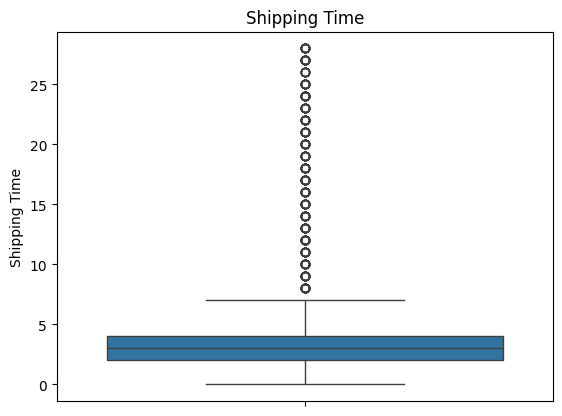

In [53]:
# Drawing a boxplot of Unit Price
sns.boxplot(y='Shipping Time', data=order)
plt.title('Shipping Time')

The Shipping column has some negative values. Thís is due to the error in recording since the Shipment Date < Order Date.

There are also unusually large values. Standard shipping within the same country might take anywhere from **2 to 7 business days.** International standard shipping can take longer, often ranging from **1 to 4 weeks.** I decided to take this information as a reference and drop the **shipping time values that < 0 and > 28**

In [55]:
# Drop the abnormal Shipping Time
order = order[(order['Shipping Time'] >= 0) & (order['Shipping Time'] <= 28)]
order

,Order ID,Order YearMonth,Order Year,Order Month,Order Day,Order Quantity,Product Department,Product Category,Product Name,Customer ID,...,Gross Sales,Discount %,Profit,Order Date,Shipment Date,Shipment YearMonth,Shipping Time,Delay Shipment,Net Sales,Unit Price
0,3535,201502,2015,2,21,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,7840,...,400.0,0.25,200.0,2015/02/21,2015-02-27,2015-2,6,Late,300.00,400.0
1,4133,201503,2015,3,2,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,1203,...,400.0,0.09,200.0,2015/03/02,2015-03-06,2015-3,4,On time,364.00,400.0
2,7396,201504,2015,4,18,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,10866,...,400.0,0.06,200.0,2015/04/18,2015-04-20,2015-4,2,On time,376.00,400.0
3,11026,201506,2015,6,10,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,...,400.0,0.15,200.0,2015/06/10,2015-06-12,2015-6,2,On time,340.00,400.0
4,11026,201506,2015,6,10,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,...,400.0,0.13,200.0,2015/06/10,2015-06-12,2015-6,2,On time,348.00,400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30866,73246,201712,2017,12,5,1,Fan Shop,Toys,Toys,16799,...,12.0,0.06,6.0,2017/12/05,2017-12-11,2017-12,6,Late,11.28,12.0
30867,7908,201504,2015,4,26,1,Fan Shop,Hunting & Shooting,ENO Atlas Hammock Straps,11950,...,30.0,0.12,68.0,2015/04/26,2015-04-30,2015-4,4,On time,26.40,30.0
30868,29326,201603,2016,3,4,1,Fan Shop,Hunting & Shooting,ENO Atlas Hammock Straps,8161,...,30.0,0.09,68.0,2016/03/04,2016-03-06,2016-3,2,On time,27.30,30.0
30869,63308,201707,2017,7,13,1,Fan Shop,Hunting & Shooting,insta-bed Neverflat Air Mattress,5733,...,150.0,0.02,60.0,2017/07/13,2017-07-17,2017-7,4,Late,147.00,150.0


In [58]:
# Create Net Sales and Unit Price column
order['Net Sales'] = order['Gross Sales'] - order['Gross Sales'] * order['Discount %']
order['Unit Price'] = order['Gross Sales'] / order['Order Quantity']
order

,Order ID,Order YearMonth,Order Year,Order Month,Order Day,Order Quantity,Product Department,Product Category,Product Name,Customer ID,...,Gross Sales,Discount %,Profit,Order Date,Shipment Date,Shipment YearMonth,Shipping Time,Delay Shipment,Net Sales,Unit Price
0,3535,201502,2015,2,21,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,7840,...,400.0,0.25,200.0,2015/02/21,2015-02-27,2015-2,6,Late,300.00,400.0
1,4133,201503,2015,3,2,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,1203,...,400.0,0.09,200.0,2015/03/02,2015-03-06,2015-3,4,On time,364.00,400.0
2,7396,201504,2015,4,18,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,10866,...,400.0,0.06,200.0,2015/04/18,2015-04-20,2015-4,2,On time,376.00,400.0
3,11026,201506,2015,6,10,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,...,400.0,0.15,200.0,2015/06/10,2015-06-12,2015-6,2,On time,340.00,400.0
4,11026,201506,2015,6,10,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,...,400.0,0.13,200.0,2015/06/10,2015-06-12,2015-6,2,On time,348.00,400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30866,73246,201712,2017,12,5,1,Fan Shop,Toys,Toys,16799,...,12.0,0.06,6.0,2017/12/05,2017-12-11,2017-12,6,Late,11.28,12.0
30867,7908,201504,2015,4,26,1,Fan Shop,Hunting & Shooting,ENO Atlas Hammock Straps,11950,...,30.0,0.12,68.0,2015/04/26,2015-04-30,2015-4,4,On time,26.40,30.0
30868,29326,201603,2016,3,4,1,Fan Shop,Hunting & Shooting,ENO Atlas Hammock Straps,8161,...,30.0,0.09,68.0,2016/03/04,2016-03-06,2016-3,2,On time,27.30,30.0
30869,63308,201707,2017,7,13,1,Fan Shop,Hunting & Shooting,insta-bed Neverflat Air Mattress,5733,...,150.0,0.02,60.0,2017/07/13,2017-07-17,2017-7,4,Late,147.00,150.0


In [59]:
# Create Storage Cost column
inventory = inventory_merge
inventory['Storage Cost'] = inventory['Inventory Cost Per Unit']*inventory['Warehouse Inventory']
inventory

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit,Product Category,Product Department,Storage Cost
0,Perfect Fitness Perfect Rip Deck,2017/12,0,0.69517,Cleats,Apparel,0.00000
1,Nike Men's Dri-FIT Victory Golf Polo,2017/12,2,1.29291,Women's Apparel,Golf,2.58582
2,O'Brien Men's Neoprene Life Vest,2017/12,0,0.56531,Indoor/Outdoor Games,Fan Shop,0.00000
3,Nike Men's Free 5.0+ Running Shoe,2017/12,1,1.26321,Cardio Equipment,Footwear,1.26321
4,Under Armour Girls' Toddler Spine Surge Runni,2017/12,0,1.47648,Shop By Sport,Golf,0.00000
...,...,...,...,...,...,...,...
4195,TaylorMade 2017 Purelite Stand Bag,2015/01,0,1.44662,Golf Gloves,Outdoors,0.00000
4196,Ogio Race Golf Shoes,2015/01,0,0.10310,Golf Bags & Carts,Outdoors,0.00000
4197,GolfBuddy VT3 GPS Watch,2015/01,0,1.77747,Kids' Golf Clubs,Outdoors,0.00000
4198,Titleist Small Wheeled Travel Cover,2015/01,0,0.15244,Golf Gloves,Outdoors,0.00000


# Exploratory Data Analysis
I concentrate on examining the features, behaviors, patterns, and trends according to the following criteria: business performance, customer, product, inventory, and shipment.


# **Business Performance**

In [ ]:
# Let's perform a descriptive analysis on the key sales metrics
order[['Order Quantity','Unit Price','Gross Sales','Net Sales','Discount %','Profit']].describe()

The average Unit Price is approximately 136, yet the maximum value reaches 533, which is about five times higher. Therefore, it's important to investigate potential outliers in the Unit Price column.

Text(0.5, 1.0, 'Unit Price')

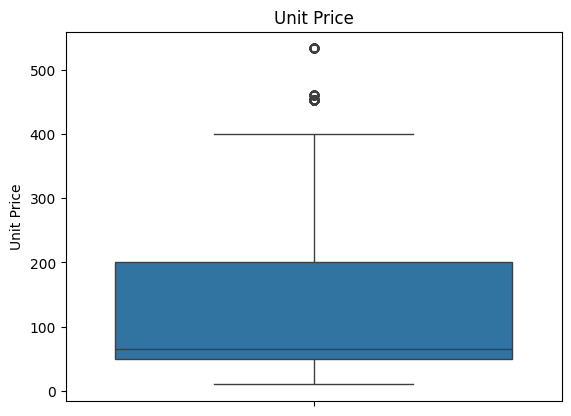

In [60]:
# Boxplot of Unit Price
sns.boxplot(y='Unit Price', data=order)
plt.title('Unit Price')

In [61]:
# Check outliners
order[order['Unit Price'] > 400]

,Order ID,Order YearMonth,Order Year,Order Month,Order Day,Order Quantity,Product Department,Product Category,Product Name,Customer ID,...,Gross Sales,Discount %,Profit,Order Date,Shipment Date,Shipment YearMonth,Shipping Time,Delay Shipment,Net Sales,Unit Price
9387,71926,201711,2017,11,15,1,Outdoors,Garden,Lawn mower,15479,...,533.0,0.06,258.0,2017/11/15,2017-11-17,2017-11,2,On time,501.02,533.0
14936,69546,201710,2017,10,11,1,Technology,Cameras,Web Camera,13099,...,452.0,0.17,219.0,2017/10/11,2017-10-14,2017-10,3,On time,375.16,452.0
14937,69656,201710,2017,10,12,1,Technology,Cameras,Web Camera,13209,...,452.0,0.15,219.0,2017/10/12,2017-10-14,2017-10,2,On time,384.20,452.0
14938,69665,201710,2017,10,13,1,Technology,Cameras,Web Camera,13218,...,452.0,0.03,219.0,2017/10/13,2017-10-15,2017-10,2,Late,438.44,452.0
14939,69823,201710,2017,10,14,1,Technology,Cameras,Web Camera,13376,...,452.0,0.07,219.0,2017/10/14,2017-10-16,2017-10,2,On time,420.36,452.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28877,75091,201712,2017,12,9,1,Outdoors,Garden,Lawn mower,18644,...,533.0,0.03,258.0,2017/12/09,2017-12-13,2017-12,4,Late,517.01,533.0
28910,71801,201711,2017,11,11,1,Outdoors,Garden,Lawn mower,15354,...,533.0,0.05,258.0,2017/11/11,2017-11-13,2017-11,2,Late,506.35,533.0
28911,71978,201711,2017,11,11,1,Outdoors,Garden,Lawn mower,15531,...,533.0,0.09,258.0,2017/11/11,2017-11-16,2017-11,5,Late,485.03,533.0
28912,71985,201711,2017,11,13,1,Outdoors,Garden,Lawn mower,15538,...,533.0,0.01,258.0,2017/11/13,2017-11-18,2017-11,5,Late,527.67,533.0


 I have decided not to exclude these outliers. Most of the outliers are electronic items, which naturally tend to have higher price tags.

## Question 1: What are the total net sales, profit and profit margin by the company?

In [62]:
total_net_sales = order['Net Sales'].sum()
total_profit = order['Profit'].sum()
profit_margin = (total_profit / total_net_sales) * 100

# Print the results with formatting
print(f"Total Net Sales: ${total_net_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Profit Margin: {profit_margin:.2f}%")

Total Net Sales: $4,604,036.11
Total Profit: $3,266,361.00
Profit Margin: 70.95%


## Question 2: What are the average net sales and profit per month?

In [64]:
# Since we have data for 3 years, we divide by 37 to get the monthly average
average_net_sales = total_net_sales / 37
average_profit = total_profit / 37

# Print the results with formatting
print(f"Average Net Sales: ${average_net_sales:,.2f}")
print(f"Average Profit: ${average_profit:,.2f}")

Average Net Sales: $124,433.41
Average Profit: $88,280.03


## Question 3: How do the net sales and profit change over time?


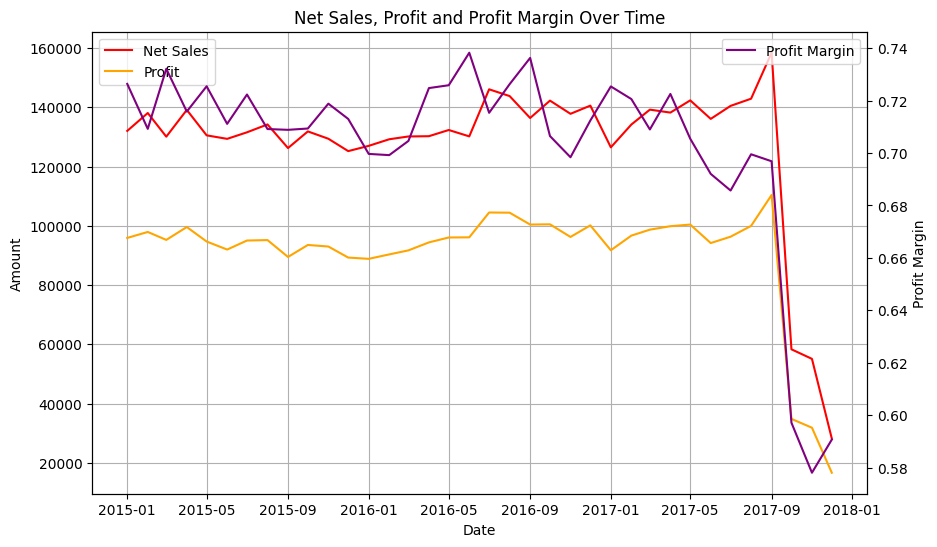

In [67]:
order['Shipment YearMonth'] = pd.to_datetime(order['Shipment YearMonth'], format='%Y-%m')

# Group data by year and month
sales = order.groupby(['Shipment YearMonth']).agg({'Net Sales': 'sum', 'Profit': 'sum'})
sales['Profit_margin'] = sales['Profit'] / sales['Net Sales']

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Net Sales and Profit on the primary y-axis
sns.lineplot(x=sales.index, y='Net Sales', data=sales, color='red', ax=ax1, label='Net Sales')
sns.lineplot(x=sales.index, y='Profit', data=sales, color='orange', ax=ax1, label='Profit')
ax1.set_xlabel('Date')
ax1.set_ylabel('Amount')
ax1.set_title('Net Sales, Profit and Profit Margin Over Time')
ax1.legend(loc='upper left')
ax1.grid(True)

# Create a secondary y-axis for Profit Margin
ax2 = ax1.twinx()
ax2.set_ylabel('Profit Margin')
sns.lineplot(x=sales.index, y='Profit_margin', data=sales, color='purple', ax=ax2, label='Profit Margin')
ax2.legend(loc='upper right')

plt.show()

The company's overall business performance indicates a period of stable net sales and profit, followed by a significant decline in Q4/2017.

Net sales remained flat for an extended period before plunging by 70% in Q4/2017.

Similarly, profit followed a similar trend during this period. Despite a 30% decrease in profit margin, it still maintained a robust margin of nearly 60%.

## Question 4: How do the number of orders change over time?

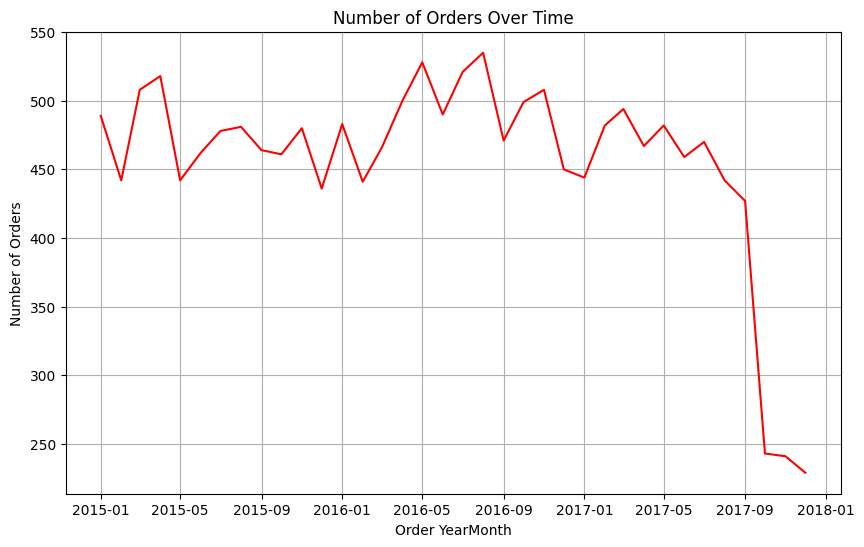

In [68]:
order['Order YearMonth'] = pd.to_datetime(order['Order YearMonth'], format='%Y%m')

# Group data by year and month
demand = order.groupby(['Order YearMonth'])['Order ID'].nunique().reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting number of orders over time
sns.lineplot(x='Order YearMonth', y='Order ID', data=demand, color='red', ax=ax1)
ax1.set_ylabel('Number of Orders')
ax1.set_title('Number of Orders Over Time')

plt.grid(True)
plt.show()

The number of orders also witnessed a sharp decline of about 85% in Q4/2017


## Question 5: How do the average order quantity and average unit price change over time?


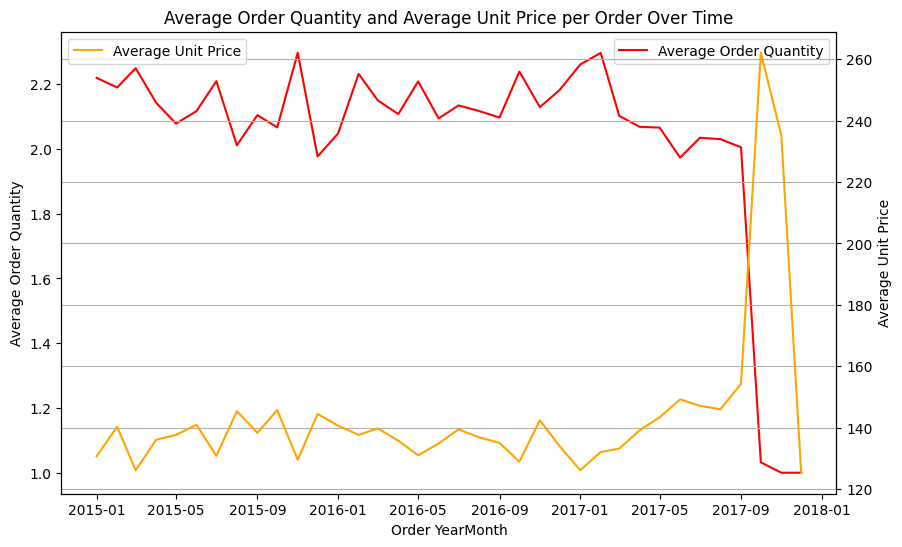

In [69]:
order['Order YearMonth'] = pd.to_datetime(order['Order YearMonth'], format='%Y/%m')

# Group data by year and month, and calculate the metrics
demand = order.groupby(['Order YearMonth']).agg({'Order Quantity': 'mean', 'Unit Price': 'mean'})

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting average order quantity on the primary y-axis
sns.lineplot(x='Order YearMonth', y='Order Quantity', data=demand, color='red', ax=ax1, label='Average Order Quantity')
ax1.set_ylabel('Average Order Quantity')

# Plotting average unit price on the secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(x='Order YearMonth', y='Unit Price', data=demand, color='orange', ax=ax2, label='Average Unit Price')
ax2.set_ylabel('Average Unit Price')

# Set x-axis label and title
plt.xlabel('Date')
plt.title('Average Order Quantity and Average Unit Price per Order Over Time')

plt.grid(True)
plt.show()

Examining the average order quantity and average unit price per order over time reveals compelling insights into the two primary factors influencing the average order value.

Initially, while the average order quantity declined, there was a significant rebound in the average unit price around October 2017, nearly doubling at its peak before sharply decreasing.

## Question 6: Which product departments account for the majority of net sales and number of orders?


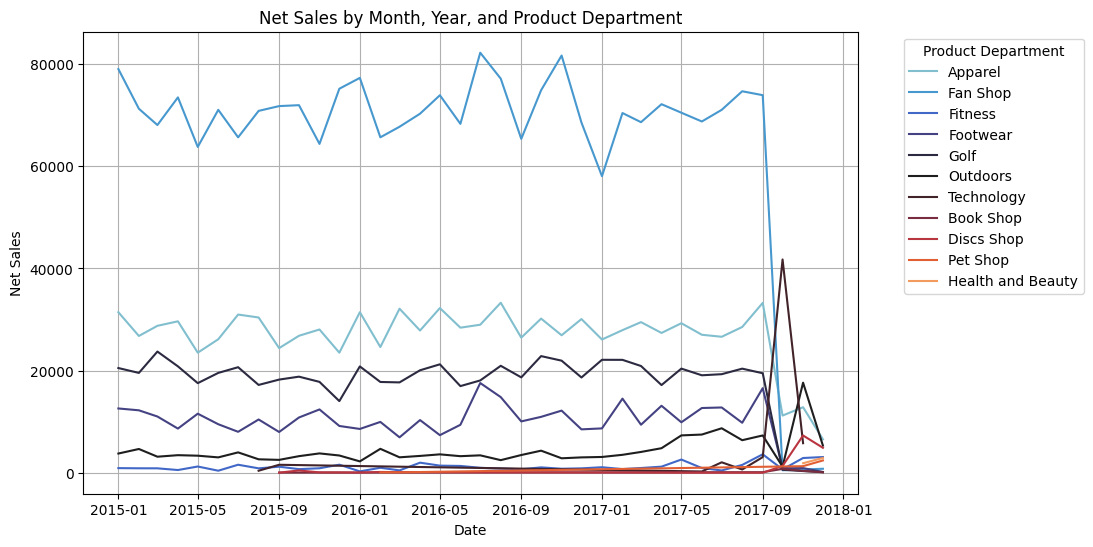

In [70]:

product_sales = order.groupby(['Order YearMonth', 'Product Department'])['Net Sales'].sum().reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting net sales by month, year, and product department
sns.lineplot(x='Order YearMonth', y='Net Sales', data=product_sales, hue='Product Department', palette='icefire', ax=ax1)

# Customize labels, title, legend, and grid
ax1.set_xlabel('Date')
ax1.set_ylabel('Net Sales')
ax1.set_title('Net Sales by Month, Year, and Product Department')
ax1.legend(title='Product Department', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True)

plt.show()

The Apparel, Fanshop, Footwear, and Golf product departments significantly contributed to net sales. However, in Q4/2017, revenue from these departments sharply declined and nearly vanished. Conversely, product departments like Technology and Discs Shop displayed promising growth trends with increasing net sales.

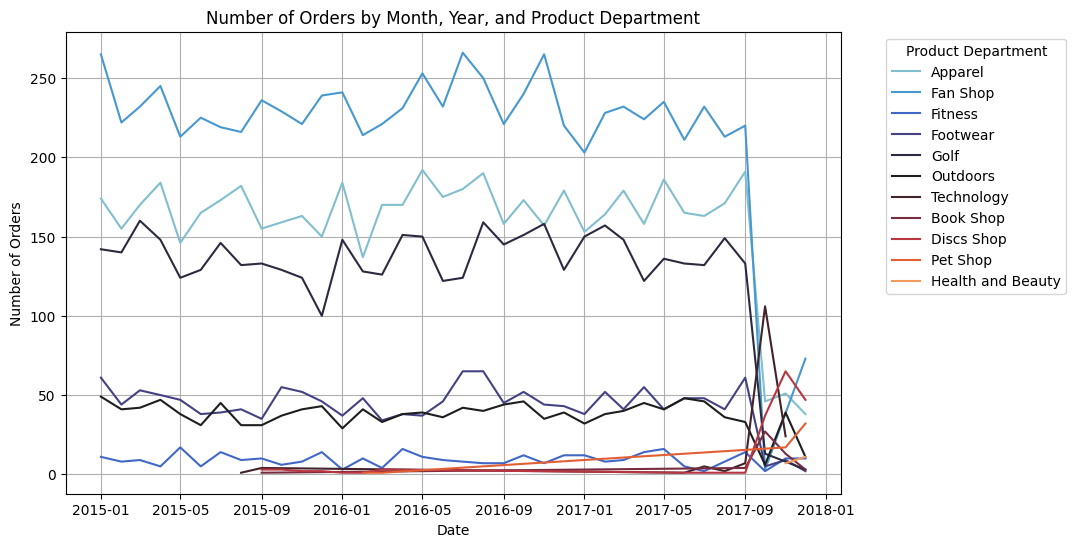

In [71]:
# Group data by year, month, and product department, and calculate the number of unique orders
product_sales = order.groupby(['Order YearMonth', 'Product Department'])['Order ID'].nunique().reset_index()
product_sales.rename(columns={'Order ID': 'Number of Orders'}, inplace=True)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting number of orders by month, year, and product department
sns.lineplot(x='Order YearMonth', y='Number of Orders', data=product_sales, hue='Product Department', palette='icefire', ax=ax1)

# Customize labels, title, legend, and grid
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Orders')
ax1.set_title('Number of Orders by Month, Year, and Product Department')
ax1.legend(title='Product Department', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True)

plt.show()

A similar trend is observed when counting the number of orders for each product department over time.

# **Customer**

## Question 1: How was the distribution of customers by country and market?


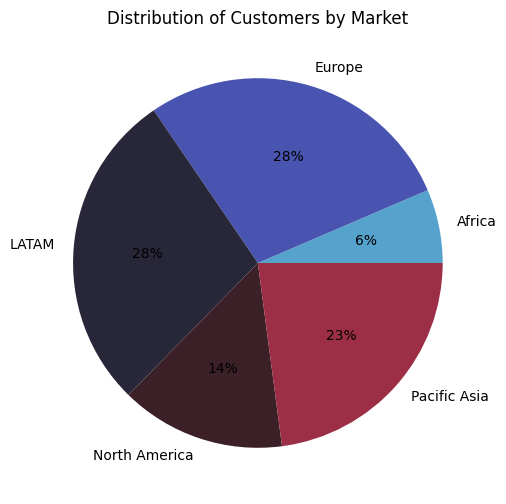

In [73]:
customer = order.groupby(['Customer Market'])['Customer ID'].nunique().reset_index()
customer.rename(columns={'Customer ID': 'Number of Customers'}, inplace=True)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Define colors using Seaborn palette
colors = sns.color_palette('icefire')

# Create pie chart
plt.pie(customer['Number of Customers'], labels=customer['Customer Market'], colors=colors, autopct='%.0f%%')
plt.title('Distribution of Customers by Market')

plt.show()

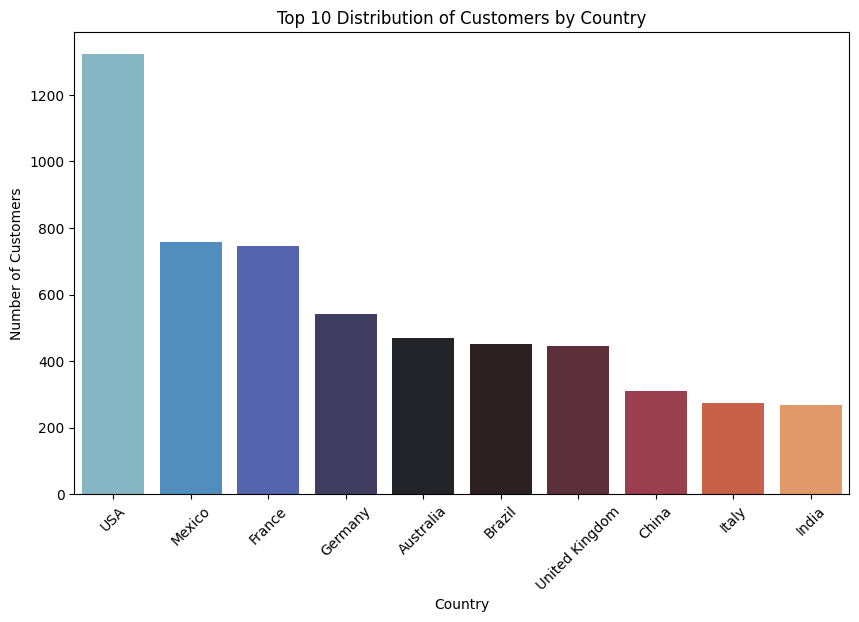

In [72]:
customer = order.groupby(['Customer Country'])['Customer ID'].nunique().reset_index()
customer.rename(columns={'Customer ID': 'Number of Customers'}, inplace=True)

# Sort by number of customers in descending order and select top 10
top_10 = customer.sort_values(by='Number of Customers', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting top 10 customer distribution by country
sns.barplot(data=top_10, x='Customer Country', y='Number of Customers', palette='icefire', ax=ax1)
ax1.set_title('Top 10 Distribution of Customers by Country')
ax1.set_xlabel('Country')
ax1.set_ylabel('Number of Customers')
plt.xticks(rotation=45)

plt.show()

The majority of customers are from LATAM, North America, Western Europe, and the Asia Pacific region.

Notably, the number of customers from the USA significantly exceeds that of other countries.

## Question 2: How many customers does the company have over time?


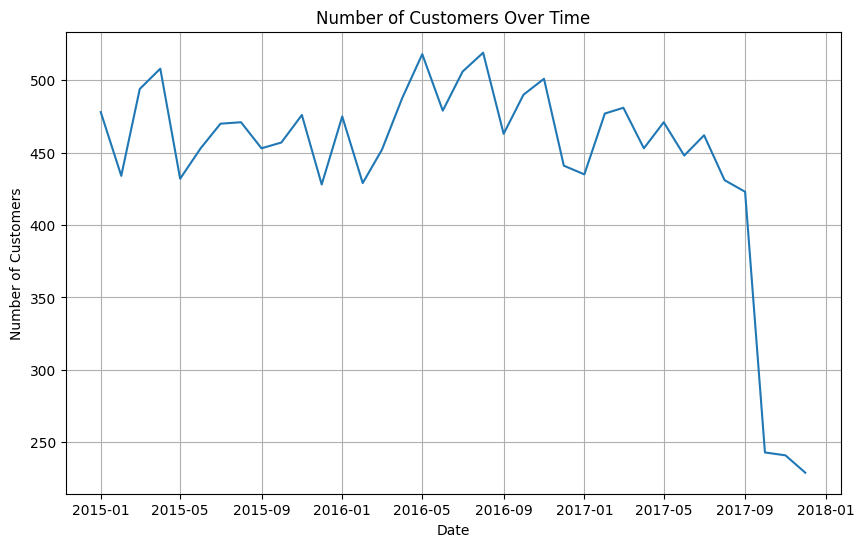

In [80]:
# Group data by year, month, and product department, and calculate the number of unique customers
customer = order.groupby(['Order YearMonth'])['Customer ID'].nunique().reset_index()
customer.rename(columns={'Customer ID': 'Number of Customers'}, inplace=True)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting number of customers over time by product department
sns.lineplot(x='Order YearMonth', y='Number of Customers', data=customer, ax=ax1)

# Customize labels, title, legend, and grid
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Customers')
ax1.set_title('Number of Customers Over Time')
ax1.grid(True)

plt.show()

The number of customers per month typically ranges between 450 to 500.

 A notable sharp decrease in the fourth quarter of 2017 highlighted a significant decline in both orders and revenue.

## Question 3: Are there any patterns or trends of buying behavior over time?


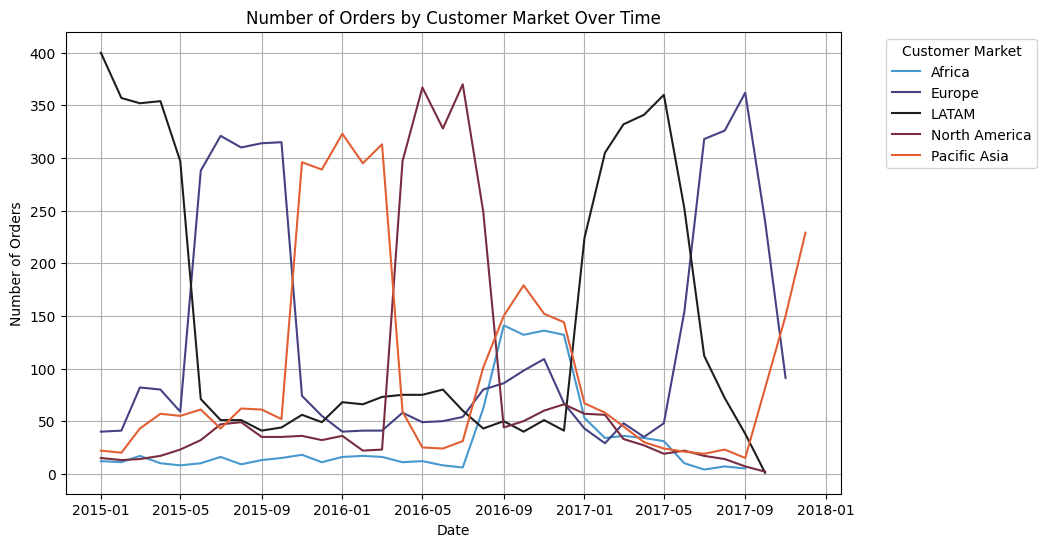

In [82]:
# Group data by year, month, and customer market, and calculate the number of unique orders
customer_orders = order.groupby(['Order YearMonth', 'Customer Market'])['Order ID'].nunique().reset_index()
customer_orders.rename(columns={'Order ID': 'Number of Orders'}, inplace=True)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting number of orders over time by customer market
sns.lineplot(x='Order YearMonth', y='Number of Orders', data=customer_orders, hue='Customer Market', palette='icefire', ax=ax1)

# Customize labels, title, legend, and grid
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Orders')
ax1.set_title('Number of Orders by Customer Market Over Time')
ax1.legend(title='Customer Market', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True)

plt.show()

Noticeably, there is a distinct purchasing trend among customers from various continents. Over time, customers from LATAM exhibit the highest frequency of purchases, followed sequentially by Europe, Asia Pacific, North America, and Africa. This cyclical pattern consistently originates from LATAM.

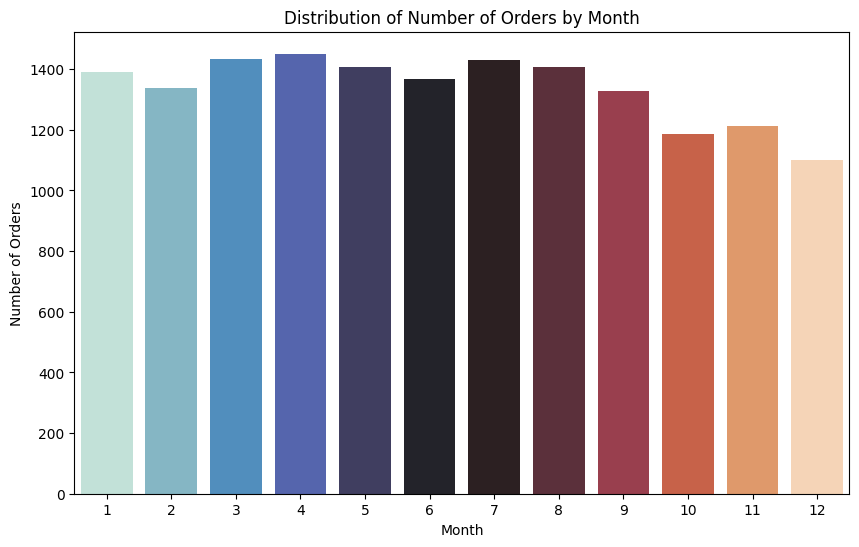

In [87]:
# Convert 'Order Month' to integer if it's not already
order['Order Month'] = order['Order Month'].astype(int)

# Group data by month and calculate the number of unique orders
customer = order.groupby(['Order Month'])['Order ID'].nunique().reset_index()
customer = customer.sort_values(by='Order Month', ascending=False)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting number of orders by month with 'Order Month' as hue
sns.barplot(data=customer, x='Order Month', y='Order ID', hue='Order Month', palette='icefire', ax=ax1, legend=False)
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Orders')
ax1.set_title('Distribution of Number of Orders by Month')

plt.show()

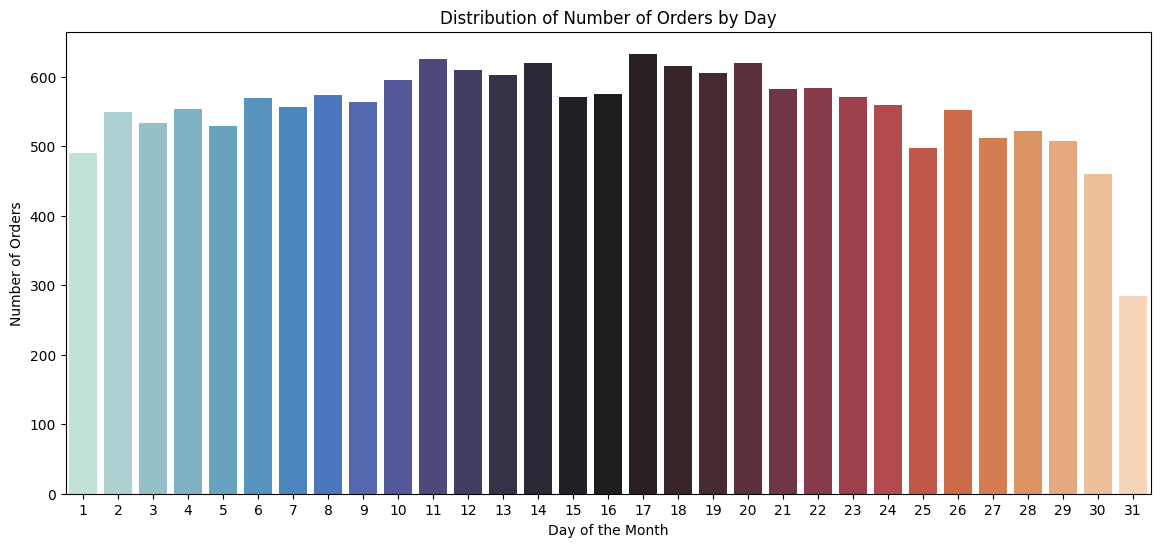

In [93]:
# Convert 'Order Day' to integer if it's not already
order['Order Day'] = order['Order Day'].astype(int)

# Group data by day and calculate the number of unique orders
customer = order.groupby(['Order Day'])['Order ID'].nunique().reset_index()
customer = customer.sort_values(by='Order Day', ascending=False)

fig, ax1 = plt.subplots(figsize=(14, 6))

# Plotting number of orders by day with 'Order Day' as hue
sns.barplot(data=customer, x='Order Day', y='Order ID', hue='Order Day', palette='icefire', ax=ax1, legend=False)
ax1.set_xlabel('Day of the Month')
ax1.set_ylabel('Number of Orders')
ax1.set_title('Distribution of Number of Orders by Day')

plt.show()

The number of orders shows minimal variation from month to month. However, regarding days, customers tend to place more orders during the middle of the month.

# **Product**

## Question 1: Which product categories and product names are most preferred?



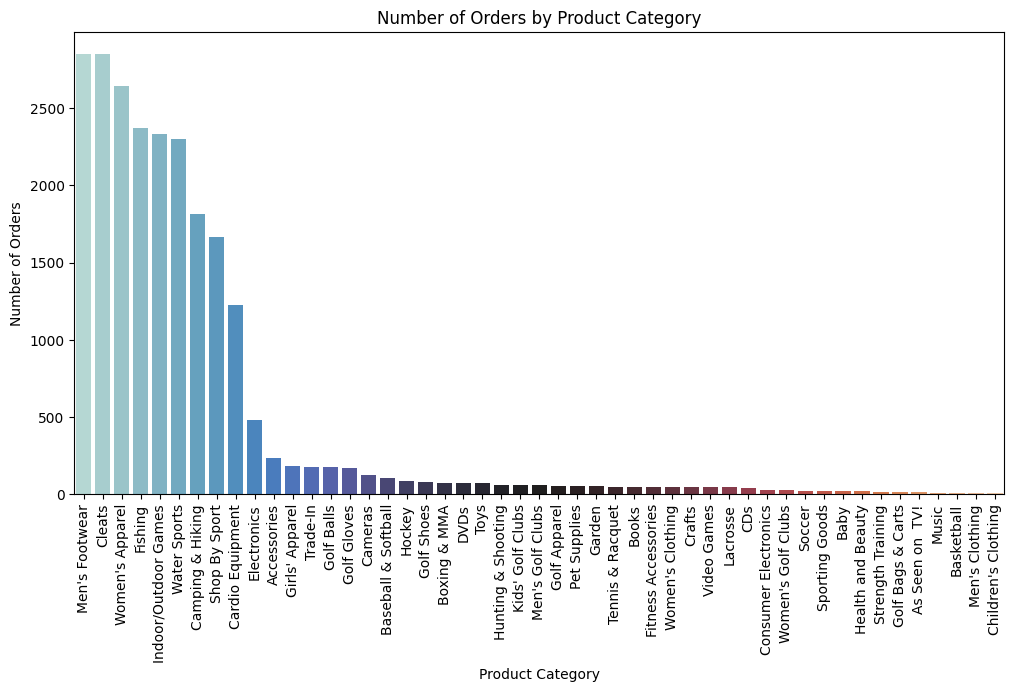

In [99]:
# Group data by product category and calculate the number of unique orders
fav = order.groupby(['Product Category'])['Order ID'].nunique().reset_index()
fav = fav.sort_values(by='Order ID', ascending=False)

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting number of orders by product category
sns.barplot(data=fav, x='Product Category', y='Order ID', hue='Product Category', palette='icefire', legend=False, ax=ax1)
ax1.set_xlabel('Product Category')
ax1.set_ylabel('Number of Orders')
ax1.set_title('Number of Orders by Product Category')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability


# Show plot
plt.show()

Leading the charts in terms of order volume are Men’s Footwear, Cleats, Women’s Apparel, Fishing, Indoor/Outdoor Games, Water Sports, Camping & Hiking, Shop by Sports and Cardio Equipment.

These categories dominate with significantly higher numbers of orders compared to others. Conversely, Electronics stands out among the less popular categories, demonstrating comparatively stronger performance.

In [106]:
# Group data by Product Name and calculate the number of unique orders
fav_products = order.groupby(['Product Name'])['Order ID'].nunique().reset_index()
fav_products = fav_products.sort_values(by='Order ID', ascending=False)

fav_products.head(10)

,Product Name,Order ID
53,Nike Men's CJ Elite 2 TD Football Cleat,2851
68,Perfect Fitness Perfect Rip Deck,2847
56,Nike Men's Dri-FIT Victory Golf Polo,2642
21,Field & Stream Sportsman 16 Gun Fire Safe,2372
64,O'Brien Men's Neoprene Life Vest,2336
67,Pelican Sunstream 100 Kayak,2297
18,Diamondback Women's Serene Classic Comfort Bi,1817
97,Under Armour Girls' Toddler Spine Surge Runni,1611
58,Nike Men's Free 5.0+ Running Shoe,1173
105,Web Camera,121



The disparity between the top 9 product categories and those ranked lower is striking.

The 10th-ranked category garnered just 179 orders, whereas the 9th-ranked category amassed 1,720 orders—almost ten times as many.

## Question 2: Which product categories and product are most profitable?


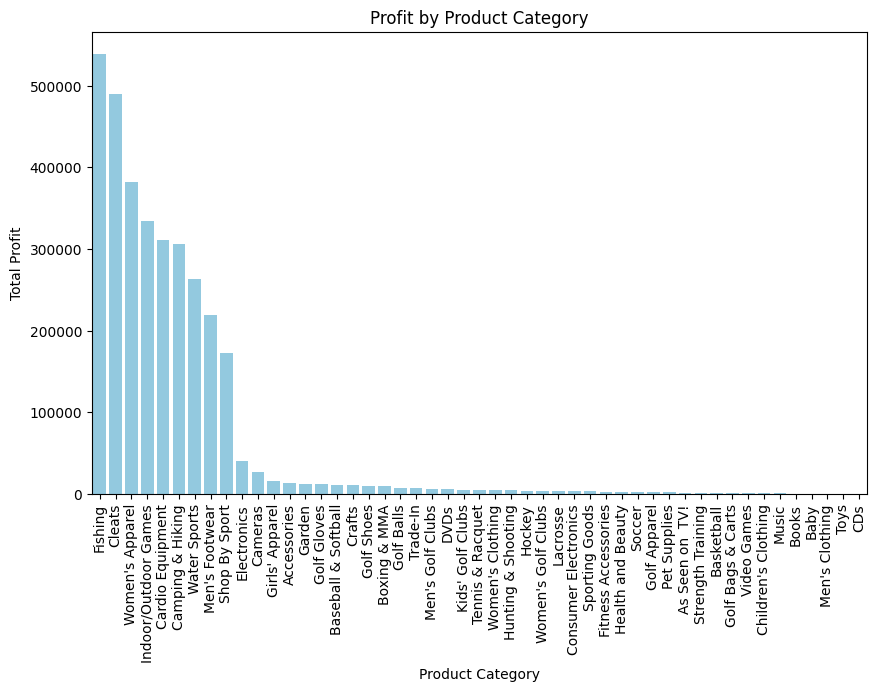

In [103]:
# Group data by Product Category and calculate the total profit
profit_by_category = order.groupby(['Product Category'])['Profit'].sum().reset_index()
profit_by_category = profit_by_category.sort_values(by='Profit', ascending=False)

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting
sns.barplot(data=profit_by_category, x='Product Category', y='Profit', color='skyblue')
plt.title('Profit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)
plt.show()


In [105]:
# Group data by Product Name and calculate the total profit
profit_by_product = order.groupby(['Product Name'])['Profit'].sum().reset_index()
profit_by_product = profit_by_product.sort_values(by='Profit', ascending=False)

# Format the Profit column
profit_by_product['Profit'] = profit_by_product['Profit'].apply(lambda x: '${:,.2f}'.format(x))

profit_by_product.head(10)

,Product Name,Profit
21,Field & Stream Sportsman 16 Gun Fire Safe,"$538,800.00"
68,Perfect Fitness Perfect Rip Deck,"$489,216.00"
56,Nike Men's Dri-FIT Victory Golf Polo,"$382,250.00"
64,O'Brien Men's Neoprene Life Vest,"$333,875.00"
58,Nike Men's Free 5.0+ Running Shoe,"$307,720.00"
18,Diamondback Women's Serene Classic Comfort Bi,"$306,600.00"
67,Pelican Sunstream 100 Kayak,"$261,700.00"
53,Nike Men's CJ Elite 2 TD Football Cleat,"$218,920.00"
97,Under Armour Girls' Toddler Spine Surge Runni,"$168,295.00"
105,Web Camera,"$26,499.00"


The top-selling products also yield the highest profits

# **Inventory**

In [107]:
inventory

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit,Product Category,Product Department,Storage Cost
0,Perfect Fitness Perfect Rip Deck,2017/12,0,0.69517,Cleats,Apparel,0.00000
1,Nike Men's Dri-FIT Victory Golf Polo,2017/12,2,1.29291,Women's Apparel,Golf,2.58582
2,O'Brien Men's Neoprene Life Vest,2017/12,0,0.56531,Indoor/Outdoor Games,Fan Shop,0.00000
3,Nike Men's Free 5.0+ Running Shoe,2017/12,1,1.26321,Cardio Equipment,Footwear,1.26321
4,Under Armour Girls' Toddler Spine Surge Runni,2017/12,0,1.47648,Shop By Sport,Golf,0.00000
...,...,...,...,...,...,...,...
4195,TaylorMade 2017 Purelite Stand Bag,2015/01,0,1.44662,Golf Gloves,Outdoors,0.00000
4196,Ogio Race Golf Shoes,2015/01,0,0.10310,Golf Bags & Carts,Outdoors,0.00000
4197,GolfBuddy VT3 GPS Watch,2015/01,0,1.77747,Kids' Golf Clubs,Outdoors,0.00000
4198,Titleist Small Wheeled Travel Cover,2015/01,0,0.15244,Golf Gloves,Outdoors,0.00000


In [108]:
# Descriptive analysis of the inventory dataframe
inventory[['Warehouse Inventory', 'Inventory Cost Per Unit', 'Storage Cost']].describe()

,Warehouse Inventory,Inventory Cost Per Unit,Storage Cost
count,4200.000000,4200.000000,4200.000000
mean,16.908095,1.236450,20.578791
std,71.121721,0.652183,100.453162
min,0.000000,0.102360,0.000000
25%,0.000000,0.672187,0.000000
50%,0.000000,1.262455,0.000000
75%,4.000000,1.800760,4.365012
max,931.000000,2.345030,1890.973240


The Inventory exhibits considerable variability, indicated by a high standard deviation of 71 units, contrasting with a modest average of approximately 16 units.

Notably, both the 25 and 50 percentiles register at zero, suggesting a significant portion of data points are at or near zero.

The maximum value recorded is 931 units, considerably higher than the 75 percentile value of just 4 units, highlighting the presence of outliers.

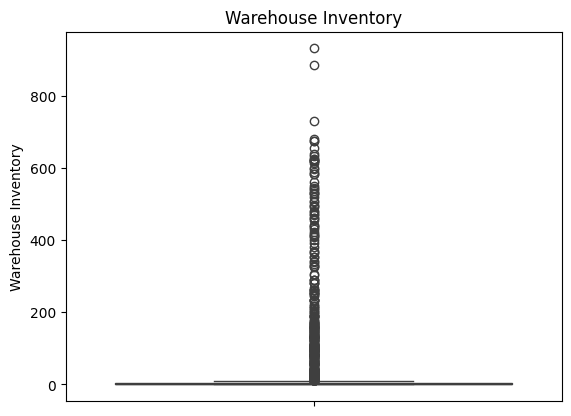

In [109]:
# Drawing a boxplot of Inventory to identify outliers
sns.boxplot(y='Warehouse Inventory', data=inventory)
plt.title('Warehouse Inventory')
plt.show()

In [110]:
inventory[inventory['Warehouse Inventory']>10]

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit,Product Category,Product Department,Storage Cost
56,Dell Laptop,2017/12,14,1.56369,None,None,21.89166
59,DVDs,2017/12,64,2.03553,DVDs,Discs Shop,130.27392
62,Summer dresses,2017/12,13,1.36250,Women's Clothing,Apparel,17.71250
65,Rock music,2017/12,16,2.26272,Music,Discs Shop,36.20352
68,Toys,2017/12,133,0.19512,Toys,Fan Shop,25.95096
...,...,...,...,...,...,...,...
4148,Glove It Women's Mod Oval 3-Zip Carry All Gol,2015/01,14,0.34936,Trade-In,Outdoors,4.89104
4150,Under Armour Women's Ignite Slide,2015/01,18,2.23827,Electronics,Footwear,40.28886
4155,Nike Women's Tempo Shorts,2015/01,43,2.30847,Cardio Equipment,Footwear,99.26421
4159,Hirzl Women's Hybrid Golf Glove,2015/01,13,1.34994,Golf Balls,Outdoors,17.54922


Several product names show zero inventory, while others exhibit significantly high inventory levels. Consequently, the company prioritizes importing and selling the top-selling products. I have chosen not to exclude the outliers.

## Question 1: Which product departments account for the majority of warehouse inventory and storage cost?


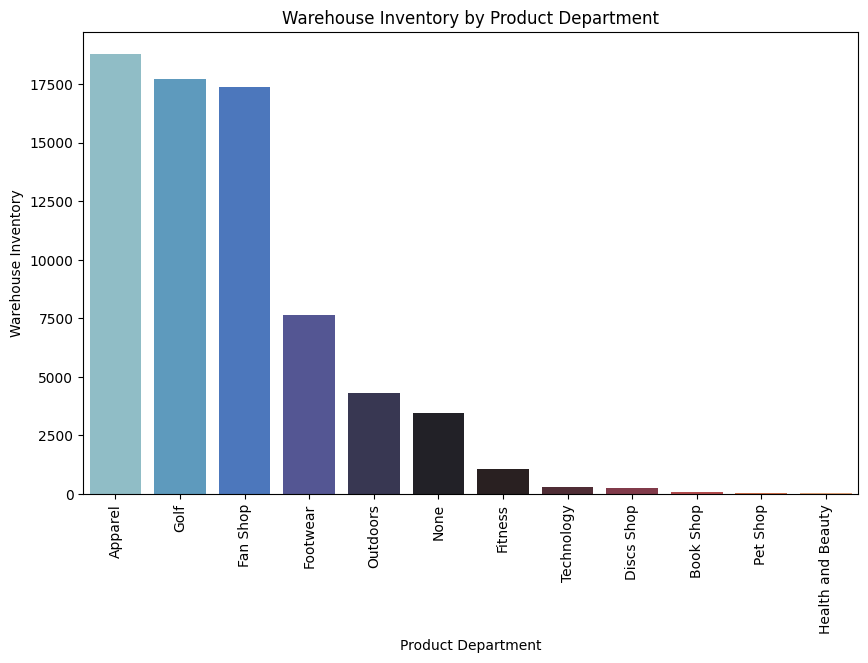

In [111]:
# Group data by Product Department and calculate the sum of Warehouse Inventory
warehouse_inventory = inventory.groupby(['Product Department'])['Warehouse Inventory'].sum().reset_index()
warehouse_inventory = warehouse_inventory.sort_values(by='Warehouse Inventory', ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting
sns.barplot(data=warehouse_inventory, x='Product Department', y='Warehouse Inventory', palette='icefire', ax=ax)
plt.title('Warehouse Inventory by Product Department')
plt.xticks(rotation=90)
plt.xlabel('Product Department')
plt.ylabel('Warehouse Inventory')

plt.show()

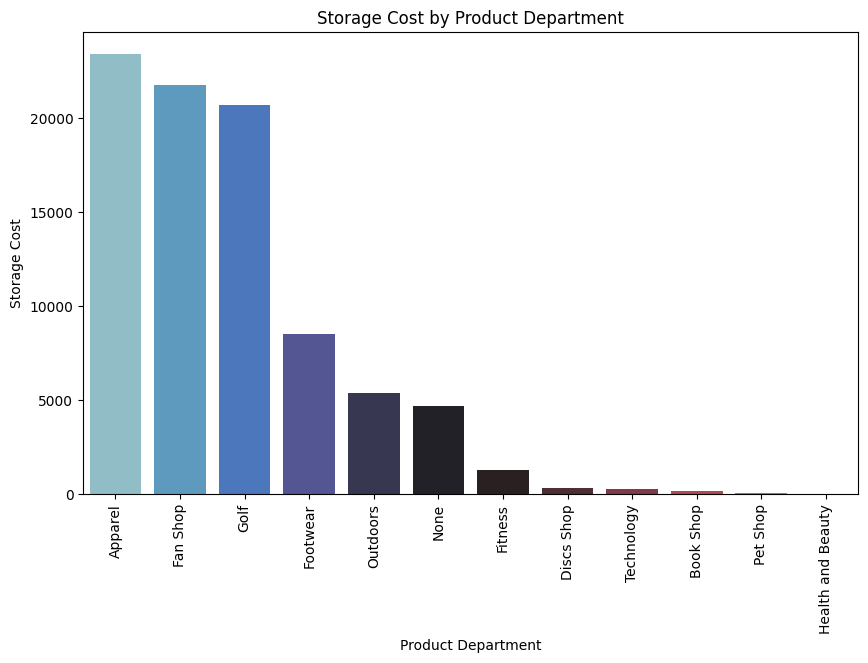

In [115]:
# Group data by Product Department and calculate the sum of Storage Cost
storage_cost_by_department = inventory.groupby(['Product Department'])['Storage Cost'].sum().reset_index()
storage_cost_by_department = storage_cost_by_department.sort_values(by='Storage Cost', ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting
sns.barplot(data=storage_cost_by_department, x='Product Department', y='Storage Cost', hue='Product Department', palette='icefire', legend=False, ax=ax)
plt.title('Storage Cost by Product Department')
plt.xticks(rotation=90)
plt.xlabel('Product Department')
plt.ylabel('Storage Cost')

plt.show()

The product departments with the highest sales volumes (Apparel, Fan Shop, Golf and Footwear—also) command the largest shares of warehouse inventory and storage costs.

## Question 2: How was the inventory cost per unit distribute by product department?


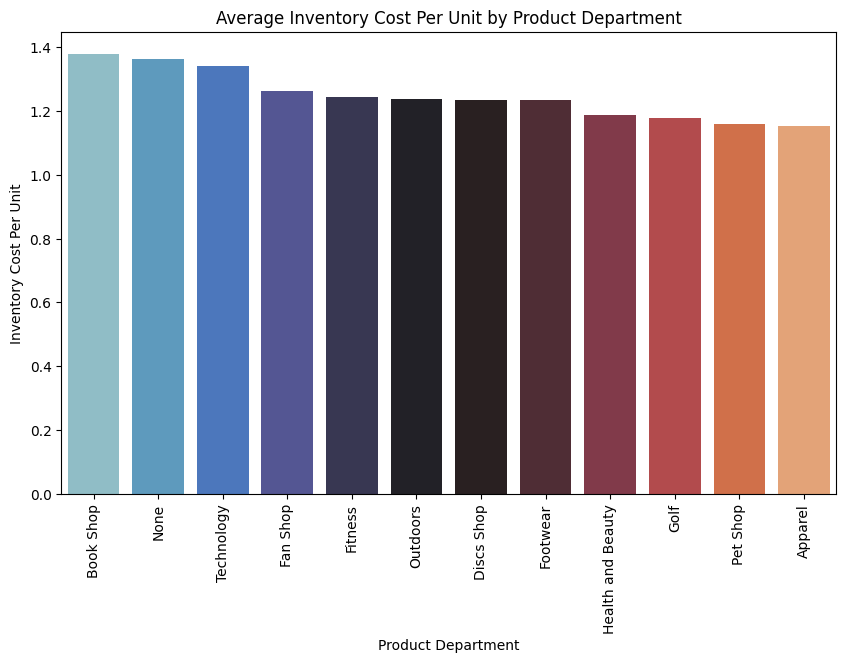

In [116]:
# Group data by Product Department and calculate the average Inventory Cost Per Unit
ware = inventory.groupby(['Product Department'])['Inventory Cost Per Unit'].mean().reset_index()
ware = ware.sort_values(by='Inventory Cost Per Unit', ascending=False)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting
sns.barplot(data=ware, x='Product Department', y='Inventory Cost Per Unit', palette='icefire')
plt.title('Average Inventory Cost Per Unit by Product Department')
plt.xticks(rotation=90)

plt.show()

The analysis reveals an inverse relationship between average inventory costs per unit and sales performance across product departments. Generally, the highest-selling departments exhibit lower average inventory costs per unit, with Fan Shop being the exception due to its comparatively high storage costs.

## Question 3: How do the warehouse inventory and storage costs change over time?


<Figure size 1200x600 with 0 Axes>

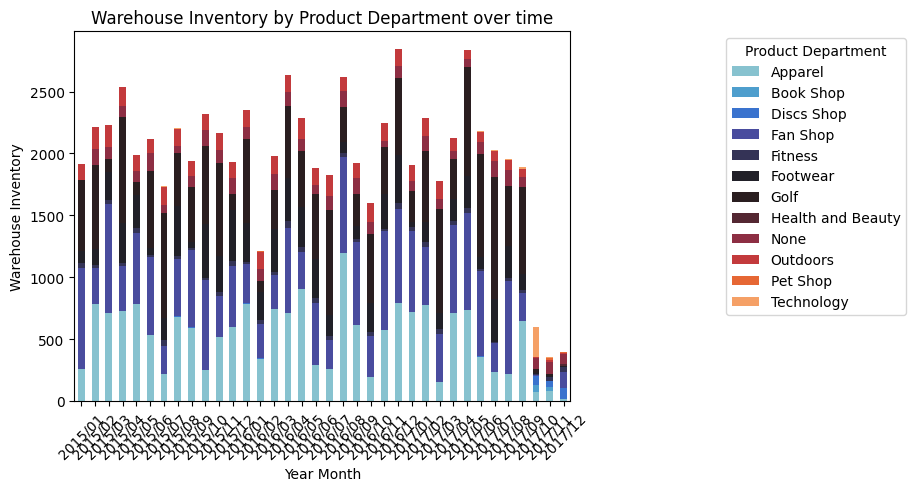

In [117]:
# Group data by Order YearMonth and Product Department, and calculate the metrics
warehousing = inventory.groupby(['Year Month','Product Department']).agg({
    'Warehouse Inventory': 'sum',
    'Storage Cost': 'sum'
})

warehousing = warehousing.sort_values(by='Year Month', ascending=True)

# Pivot the DataFrame for better visualization
invent = warehousing.pivot_table(index='Year Month', columns='Product Department', values='Warehouse Inventory', aggfunc='first')

# Plotting
plt.figure(figsize=(12, 6))
invent.plot(kind='bar', stacked=True, title='Warehouse Inventory by Product Department over time',
            color=sns.color_palette('icefire', n_colors=12))
plt.legend(title='Product Department', bbox_to_anchor=(1.3, 1), loc='upper left')
plt.xlabel('Year Month')
plt.ylabel('Warehouse Inventory')
plt.xticks(rotation=45)

plt.show()

The top-selling departments (Apparel, Golf, Fanshop) consistently maintain high inventory levels but experienced nearly depleted stock levels in Q4/2017.

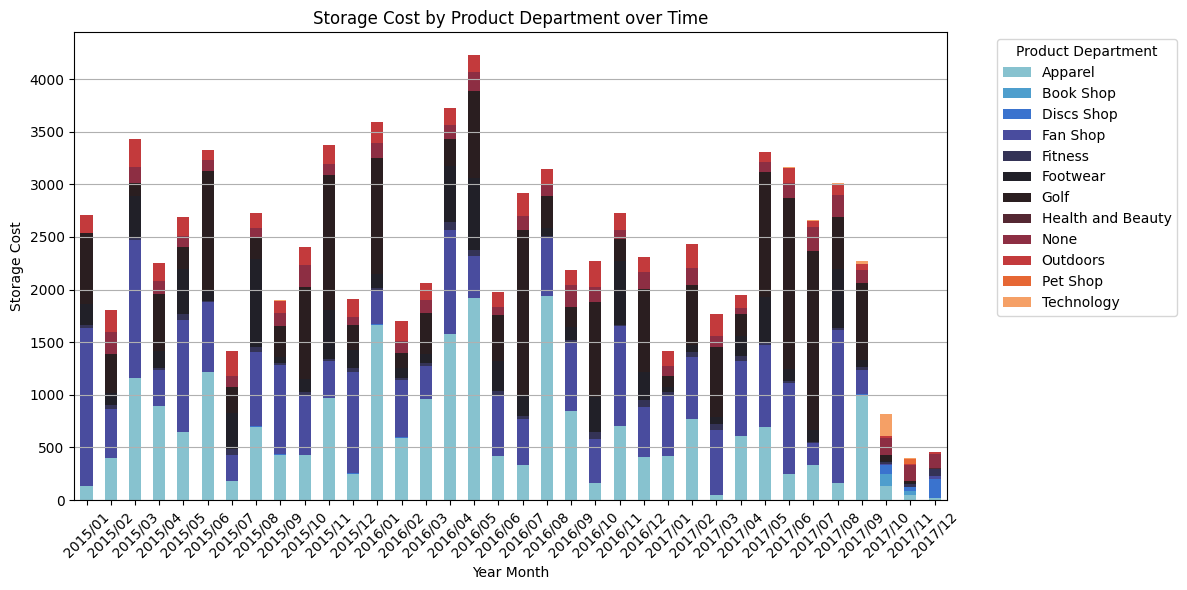

In [119]:
# Pivot the DataFrame
store = warehousing.pivot_table(index='Year Month', columns='Product Department', values='Storage Cost', aggfunc='first')

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
store.plot(kind='bar', stacked=True, ax=ax, color=sns.color_palette('icefire', n_colors=12))
plt.title('Storage Cost by Product Department over Time')
plt.xlabel('Year Month')
plt.ylabel('Storage Cost')
plt.legend(title='Product Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()

plt.show()

The best-selling departments, such as Apparel, Golf, and Fanshop, dominate the majority of storage costs. Recently, additional costs have been allocated to departments like Technology and Pet Shop. Significant storage costs also extend to products with lower customer demand.

The sharp decline in both revenue and storage costs suggests a possible incident disrupting the company's ability to maintain inventory for these top-selling products.

This disruption could stem from supply chain issues. Moreover, while the company consistently imports large quantities of best-selling products, newer items like Technology have only recently seen imports. This strategy hints at potential shifts in product offerings to gauge market demand.

## Question 4: What is the average of the average fulfillment order?


In [120]:
fulfillment.describe()

,Warehouse Order Fulfillment (days)
count,118.000000
mean,5.333898
std,2.414282
min,1.000000
25%,3.300000
50%,5.300000
75%,6.975000
max,9.900000


## Question 5: What is the average of the average fulfillment order?


In [121]:
fulfillment['Warehouse Order Fulfillment (days)'].mean()

5.333898305084746

## Question 6: Which product names have the lowest and highest average order fulfillment ?


In [123]:
# Sorting and selecting top 10 product names by average fulfillment order
top10_fulfillment = fulfillment.sort_values(by='Warehouse Order Fulfillment (days)', ascending=False).head(10)
top10_fulfillment

,Product Name,Warehouse Order Fulfillment (days)
38,Titleist Pro V1x Golf Balls,9.9
80,Nike Kids' Grade School KD VI Basketball Shoe,9.9
66,Elevation Training Mask 2.0,9.8
48,Bridgestone e6 Straight Distance NFL Tennesse,9.5
13,LIJA Women's Eyelet Sleeveless Golf Polo,9.5
3,Nike Men's Free 5.0+ Running Shoe,9.4
65,Rock music,9.3
95,adidas Brazuca 2017 Official Match Ball,9.3
19,Columbia Men's PFG Anchor Tough T-Shirt,9.1
30,Team Golf Pittsburgh Steelers Putter Grip,9.1


In [125]:
# Sorting and selecting top 10 product names by lowest average fulfillment order
top10_lowest_fulfillment = fulfillment.sort_values(by='Warehouse Order Fulfillment (days)', ascending=True).head(10)
top10_lowest_fulfillment

,Product Name,Warehouse Order Fulfillment (days)
112,Diamondback Girls' Clarity 24 Hybrid Bike 201,1.0
39,adidas Men's Germany Black Crest Away Tee,1.0
107,Total Gym 1400,1.3
92,Mio ALPHA Heart Rate Monitor/Sport Watch,1.3
88,LIJA Women's Button Golf Dress,1.4
104,Polar Loop Activity Tracker,1.4
21,Team Golf Tennessee Volunteers Putter Grip,1.7
98,Nike Men's Kobe IX Elite Low Basketball Shoe,1.8
7,Pelican Sunstream 100 Kayak,1.8
114,SOLE E35 Elliptical,1.9


## Question 7: What average order fulfillment of each product departments?


In [126]:
# Merge table product and fulfillment
product_ful = pd.merge(fulfillment, product, on='Product Name')

# Calculate average fulfillment order for each product department
product_dep_avg_fulfillment = product_ful.groupby(['Product Department'])['Warehouse Order Fulfillment (days)'].mean()
product_dep_avg_fulfillment = product_dep_avg_fulfillment.sort_values(ascending=False)

product_dep_avg_fulfillment

Product Department
Discs Shop           7.050000
Pet Shop             6.900000
Apparel              5.962500
Fitness              5.950000
Golf                 5.562500
Outdoors             5.515385
Book Shop            5.200000
Footwear             4.876923
Technology           4.400000
Fan Shop             3.955556
Health and Beauty    2.300000
Name: Warehouse Order Fulfillment (days), dtype: float64

Interestingly, the best-selling departments exhibit the longest replenishment times, which contrasts sharply with lesser-known products such as Technology and Health and Beauty.

# Shipment

## Question 1: Which warehouses are orders shipped from?


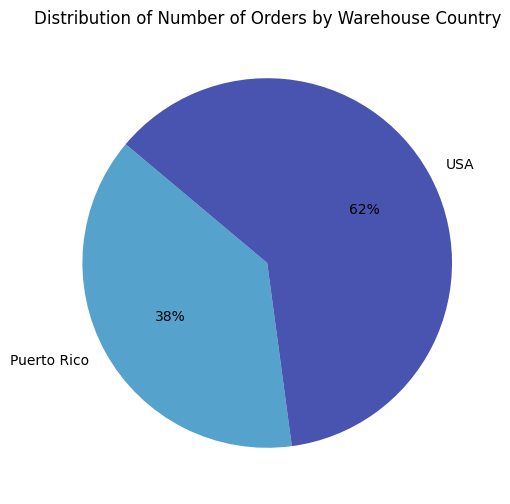

In [127]:
# Group data by warehouse country and calculate the number of unique orders
house = order.groupby(['Warehouse Country'])['Order ID'].nunique().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting
data = house['Order ID']
labels = house['Warehouse Country']
colors = sns.color_palette('icefire')

plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%', startangle=140)
plt.title('Distribution of Number of Orders by Warehouse Country')

plt.show()

Warehouses are situated in only two locations: the USA and Puerto Rico, both in North and Central America. The majority of orders, over 60%, are shipped from the USA.

## Question 2: Which shipment modes are preferred by customers?


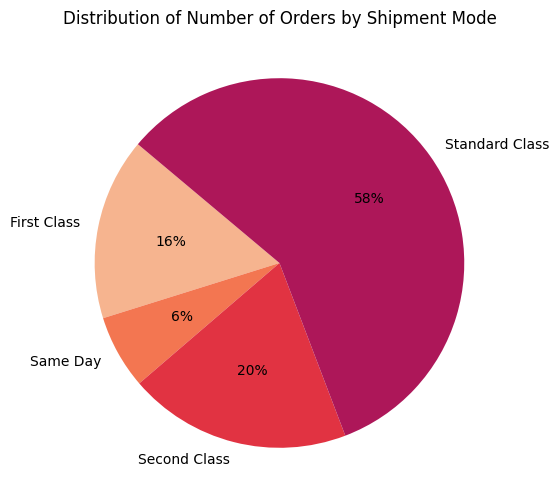

In [128]:
# Group data by shipment mode and calculate the number of unique order IDs
mode = order.groupby(['Shipment Mode'])['Order ID'].nunique().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting
data = mode['Order ID']
labels = mode['Shipment Mode']
colors = sns.color_palette('rocket_r')

plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%', startangle=140)  # Adjust startangle for better visibility
plt.title('Distribution of Number of Orders by Shipment Mode')

plt.show()



Customers prefer to choose Standard Class, which account for 58% of the total orders.


## Question 3: What is the shipping time for each shipment mode?


In [129]:
# Group data and calculate the metrics
time = order.groupby(['Shipping Time', 'Shipment Mode'])['Order ID'].nunique().reset_index()
# Pivot
time_pivot = time.pivot(index='Shipping Time', columns='Shipment Mode', values='Order ID')

time_pivot

Shipment Mode,First Class,Same Day,Second Class,Standard Class
Shipping Time,,,,
0,48.0,310.0,72.0,161.0
1,55.0,269.0,61.0,139.0
2,1484.0,139.0,940.0,2890.0
3,163.0,73.0,241.0,851.0
4,144.0,80.0,825.0,2507.0
5,175.0,92.0,221.0,824.0
6,160.0,76.0,535.0,1665.0
7,4.0,3.0,10.0,13.0
8,4.0,3.0,6.0,15.0


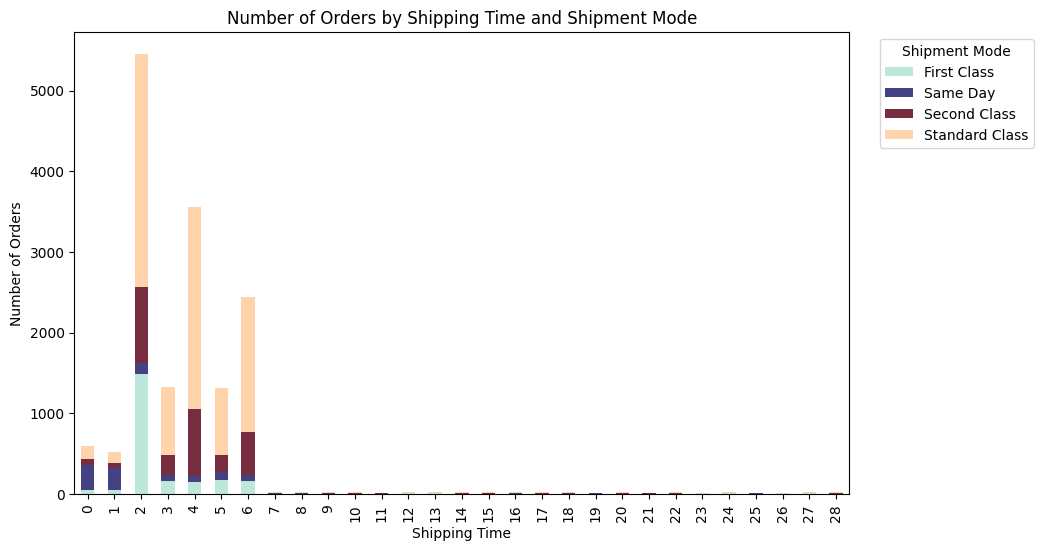

In [131]:
# Plotting
ax = time_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='icefire')
plt.title('Number of Orders by Shipping Time and Shipment Mode')
plt.xlabel('Shipping Time')
plt.ylabel('Number of Orders')
plt.legend(title='Shipment Mode', bbox_to_anchor=(1.03, 1), loc='upper left')

plt.show()

Interestingly, despite selecting fast shipment modes like same day and first class for quite a few orders, the company is experiencing delays in shipping items, impacting overall shipping times.

## Question 4: What is the late shipment rate by product department and market?


In [132]:
# Filter and count the number of late orders per Product Department
late = order[order['Delay Shipment'] == 'Late'].groupby('Product Department').size().reset_index(name='Late Orders')

# Calculate total orders per Product Department merging with total orders
total = order.groupby('Product Department').size().reset_index(name='Total Orders')
late_order = pd.merge(late, total, on='Product Department')

# Compute late shipment rate
late_order['Late Shipment Rate'] = late_order['Late Orders'] / late_order['Total Orders']

late_order

,Product Department,Late Orders,Total Orders,Late Shipment Rate
0,Apparel,3017,6828,0.441857
1,Book Shop,20,48,0.416667
2,Discs Shop,67,167,0.401198
3,Fan Shop,4302,10168,0.423092
4,Fitness,132,338,0.390533
5,Footwear,712,1653,0.430732
6,Golf,2205,5041,0.437413
7,Health and Beauty,6,18,0.333333
8,Outdoors,605,1399,0.432452
9,Pet Shop,24,51,0.470588


Across most product departments, the Late Shipment Rate averages around 40%, with Health and Beauty notably exceeding 50%.

## Questão 5: How the late shipment rate fluctuate over time?

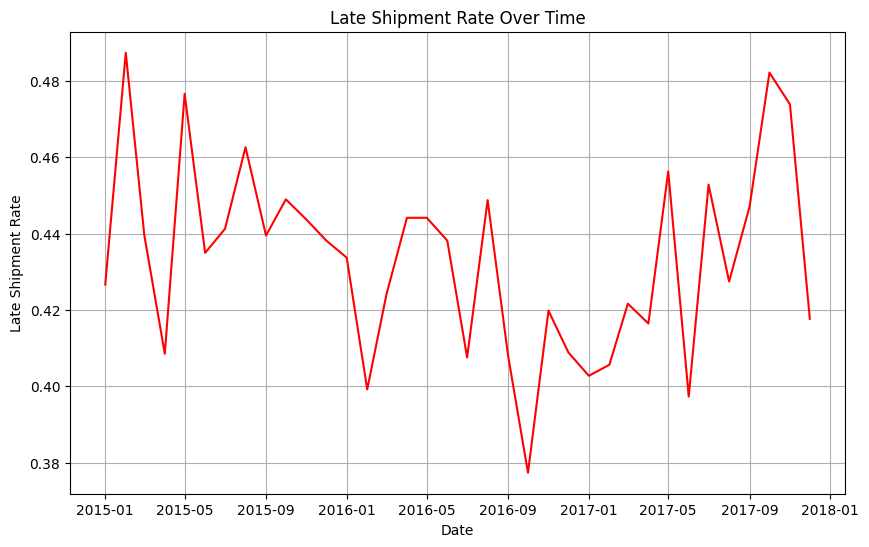

In [133]:
# Calculate the number of late orders and total orders per Shipment YearMonth
late = order[order['Delay Shipment'] == 'Late'].groupby('Shipment YearMonth').size().reset_index(name='Late Orders')
total = order.groupby('Shipment YearMonth').size().reset_index(name='Total Orders')

# Merge late and total orders dataframes on Shipment YearMonth
late_order = pd.merge(late, total, on='Shipment YearMonth')

# Calculate late shipment rate by Shipment YearMonth
late_order['Late Shipment Rate'] = late_order['Late Orders'] / late_order['Total Orders']

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting
sns.lineplot(x='Shipment YearMonth', y='Late Shipment Rate', data=late_order, color='red')
plt.xlabel('Date')
plt.ylabel('Late Shipment Rate')
plt.title('Late Shipment Rate Over Time')
plt.grid(True)

plt.show()

The late shipment rate has fluctuated between 30% and 50% over time.

The sustained average late shipment rate of around 40% over an extended period, irrespective of product departments or geographical factors, is concerning.

It highlights inefficiencies in the supply chain system that require urgent improvement.